In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dataset = pd.read_csv("Food_Inspections.csv")
dataset.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2612973,"KANGROO KORNER LEARNING CENTER AND NURSERY, INC.",KANGAROO KORNER LEARNING CENTER,2216017.0,Daycare Above and Under 2 Years,Risk 1 (High),3446-3458 W FULLERTON AVE,CHICAGO,IL,60647.0,02/28/2025,Canvass,Pass,NaN,41.924752,-87.713965,POINT (-87.71396498305502 41.92475175044067)
1,2612998,TACO CITY LLC,TACO CITY,3015525.0,Restaurant,Risk 1 (High),3300 W FULLERTON AVE,CHICAGO,IL,60647.0,02/28/2025,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.924786,-87.710825,POINT (-87.71082530032471 41.92478563490711)
2,2613006,EL HABANERO INC.,EL HABANERO,2283297.0,Restaurant,Risk 1 (High),3300 W FULLERTON AVE,CHICAGO,IL,60647.0,02/28/2025,Canvass,Out of Business,NaN,41.924786,-87.710825,POINT (-87.71082530032471 41.92478563490711)
3,2612987,BRIOCHE DOREE T-1,BRIOCHE DOREE (T1-C20),34243.0,Restaurant,Risk 2 (Medium),11601 W TOUHY AVE,CHICAGO,IL,60666.0,02/28/2025,Canvass,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,42.008751,-87.906874,POINT (-87.90687413400109 42.00875076599798)
4,2613013,MARGARITA'S PIZZERIA,MARGARITA'S PIZZERIA,48819.0,Restaurant,Risk 1 (High),2705 - 2707 E 79TH ST,CHICAGO,IL,60649.0,02/28/2025,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.751723,-87.558700,POINT (-87.55869963532268 41.75172337100072)


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115062 entries, 0 to 115061
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    115062 non-null  int64  
 1   DBA Name         115062 non-null  object 
 2   AKA Name         114813 non-null  object 
 3   License #        115058 non-null  float64
 4   Facility Type    114445 non-null  object 
 5   Risk             115033 non-null  object 
 6   Address          115062 non-null  object 
 7   City             114977 non-null  object 
 8   State            115026 non-null  object 
 9   Zip              115055 non-null  float64
 10  Inspection Date  115062 non-null  object 
 11  Inspection Type  115062 non-null  object 
 12  Results          115062 non-null  object 
 13  Violations       81615 non-null   object 
 14  Latitude         114644 non-null  float64
 15  Longitude        114644 non-null  float64
 16  Location         114644 non-null  obje

Replacing empty space with '_' for better column indexing

In [4]:
dataset.columns = dataset.columns.str.replace(' ', '_')
dataset.columns

Index(['Inspection_ID', 'DBA_Name', 'AKA_Name', 'License_#', 'Facility_Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection_Date',
       'Inspection_Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

Sum of empty values in each colunms

In [7]:
dataset.isna().sum()

Inspection_ID          0
DBA_Name               0
AKA_Name             249
License_#              4
Facility_Type        617
Risk                  29
Address                0
City                  85
State                 36
Zip                    7
Inspection_Date        0
Inspection_Type        0
Results                0
Violations         33447
Latitude             418
Longitude            418
Location             418
dtype: int64

**Data Cleaning** : Droping empty rows and unusefull columns.
1. The "Risk" and "Facility_Type" columns are the most important. Empty rows do not provide any useful information; therefore, we will drop these empty rows.
2. In column "Risk" and State drop values == 'All' and values != 'IL'

*Unuseful Columns*
1. 'AKA_Name' is the business public name and have some  redundant values with DBA_Name "Doing Business As".

2. 'License_#' is not usefull.


In [8]:


dataset.dropna(subset=['Facility_Type','Risk'], inplace=True)

dataset.drop(dataset[dataset['Risk'] == 'All'].index,inplace=True)
dataset.drop(dataset[dataset['State'] != 'IL'].index,inplace=True)
dataset.drop(columns=['AKA_Name','License_#'], axis=1, inplace=True)


Risk values for each category

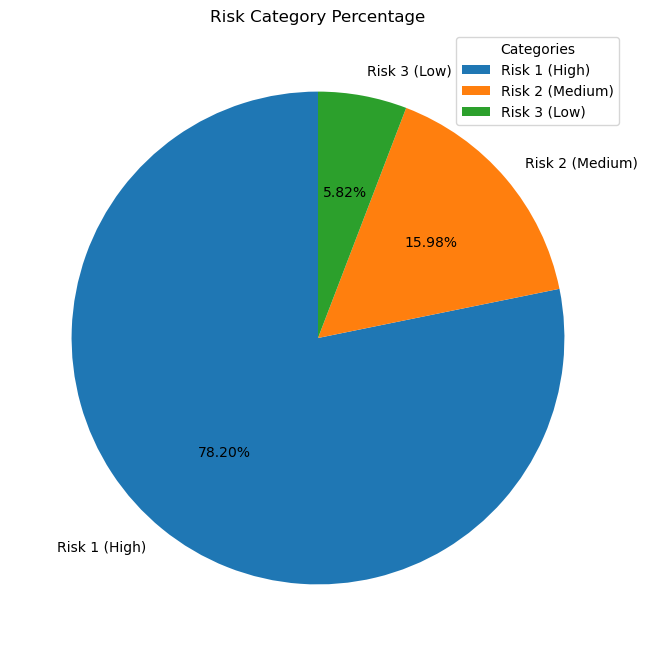

Risk
Risk 1 (High)      89438
Risk 2 (Medium)    18272
Risk 3 (Low)        6661
Name: count, dtype: int64

In [9]:
Risk_value_counts = dataset['Risk'].value_counts()


plt.figure(figsize=(8, 8))  # Increase figure size
Risk_value_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Risk Category Percentage')
plt.ylabel('')  # Hide the y-label
plt.legend(Risk_value_counts.index, title="Categories", loc="best")
plt.show()
dataset['Risk'].value_counts()

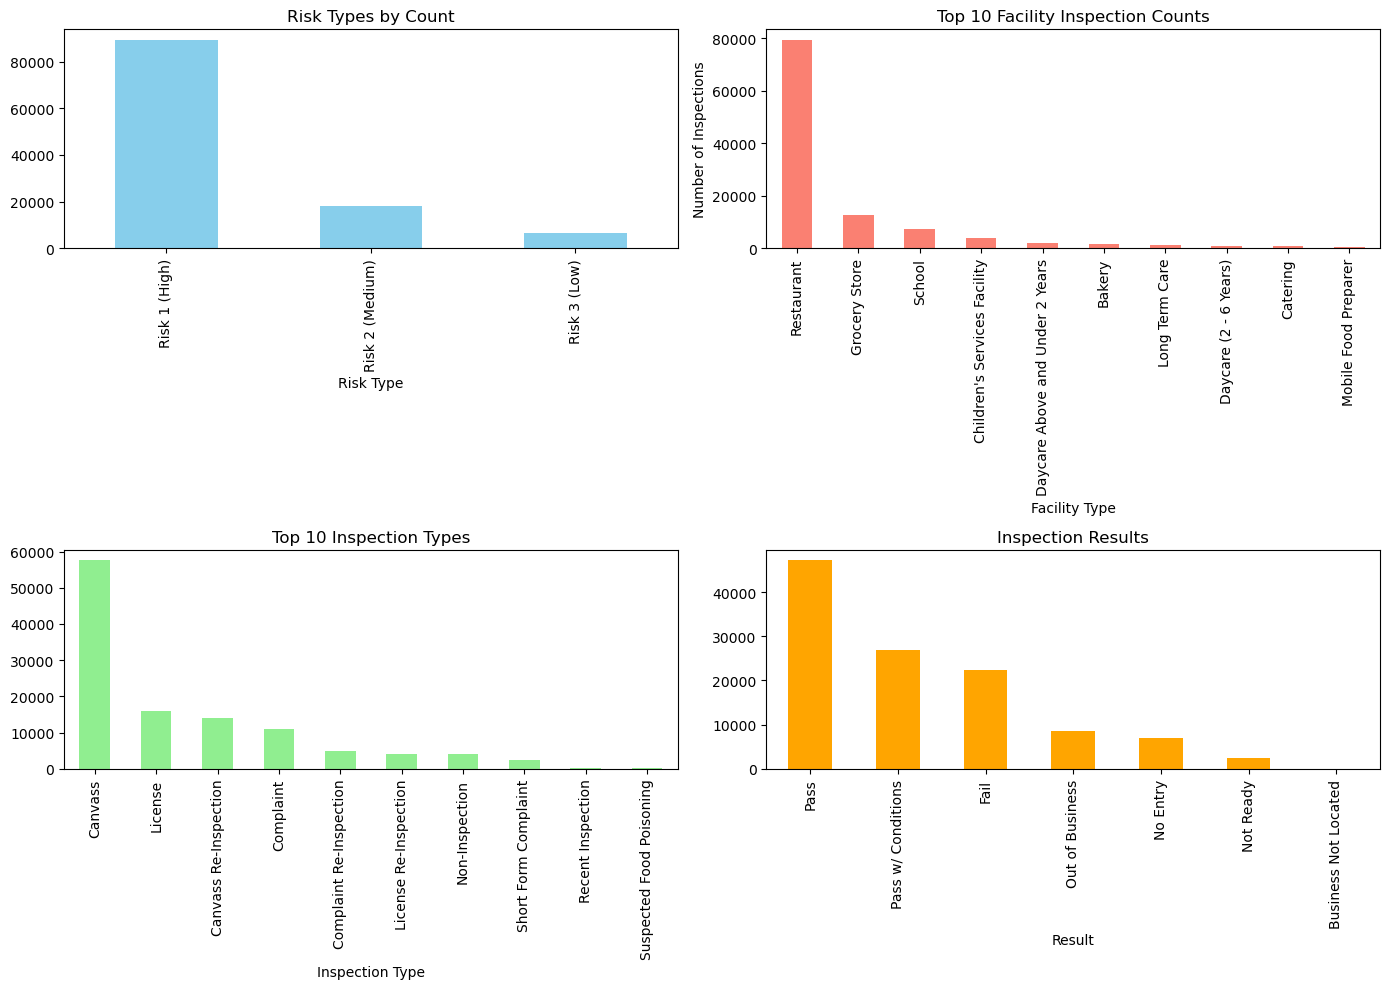

In [44]:

# Risk value counts
Risk_value_counts = dataset['Risk'].value_counts()
Facility_Type_value_counts = dataset['Facility_Type'].value_counts()[:10]
Inspection_Type_value_counts = dataset['Inspection_Type'].value_counts()[:10]
Result_value_counts = dataset['Results'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Risk value counts
Risk_value_counts.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Risk Types by Count')
axs[0, 0].set_xlabel('Risk Type')
axs[0, 0].set_ylabel('')

# Plot Facility Type value counts
Facility_Type_value_counts[:10].plot(kind='bar', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Top 10 Facility Inspection Counts')
axs[0, 1].set_xlabel('Facility Type')
axs[0, 1].set_ylabel('Number of Inspections')

# Plot Inspection Type value counts
Inspection_Type_value_counts.plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Top 10 Inspection Types')
axs[1, 0].set_xlabel('Inspection Type')
axs[1, 0].set_ylabel('')

# Plot Result value counts
Result_value_counts.plot(kind='bar', ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Inspection Results')
axs[1, 1].set_xlabel('Result')
axs[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()





How many violations are associated with each risk level.

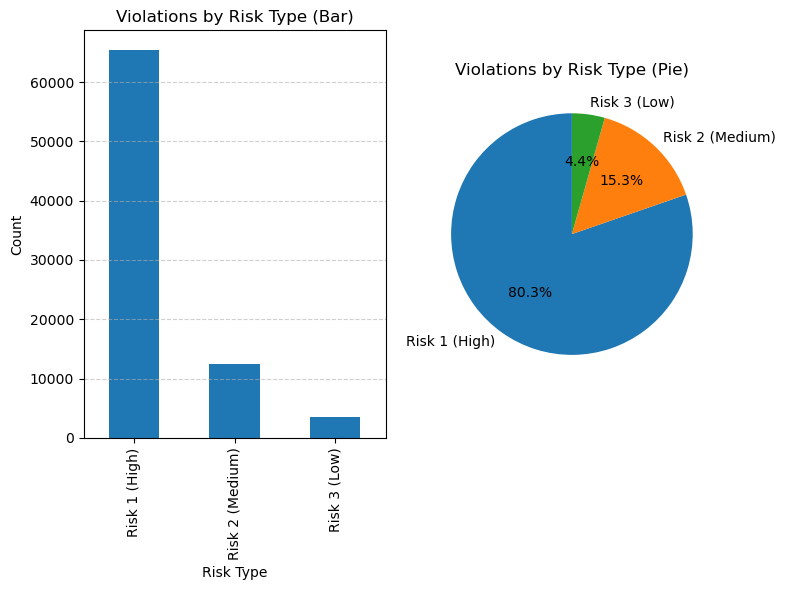

Risk
Risk 1 (High)      65443
Risk 2 (Medium)    12474
Risk 3 (Low)        3578
Name: Violations, dtype: int64

In [55]:
violations_by_risk = dataset.groupby('Risk')['Violations'].count()

fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot Risk value counts as bar chart
violations_by_risk.plot(kind='bar', ax=axs[0])
axs[0].set_title('Violations by Risk Type (Bar)')
axs[0].set_xlabel('Risk Type')
axs[0].set_ylabel('Count')
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot Risk value counts as pie chart
violations_by_risk.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Violations by Risk Type (Pie)')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

violations_by_risk

 How many inspections occurred each year.

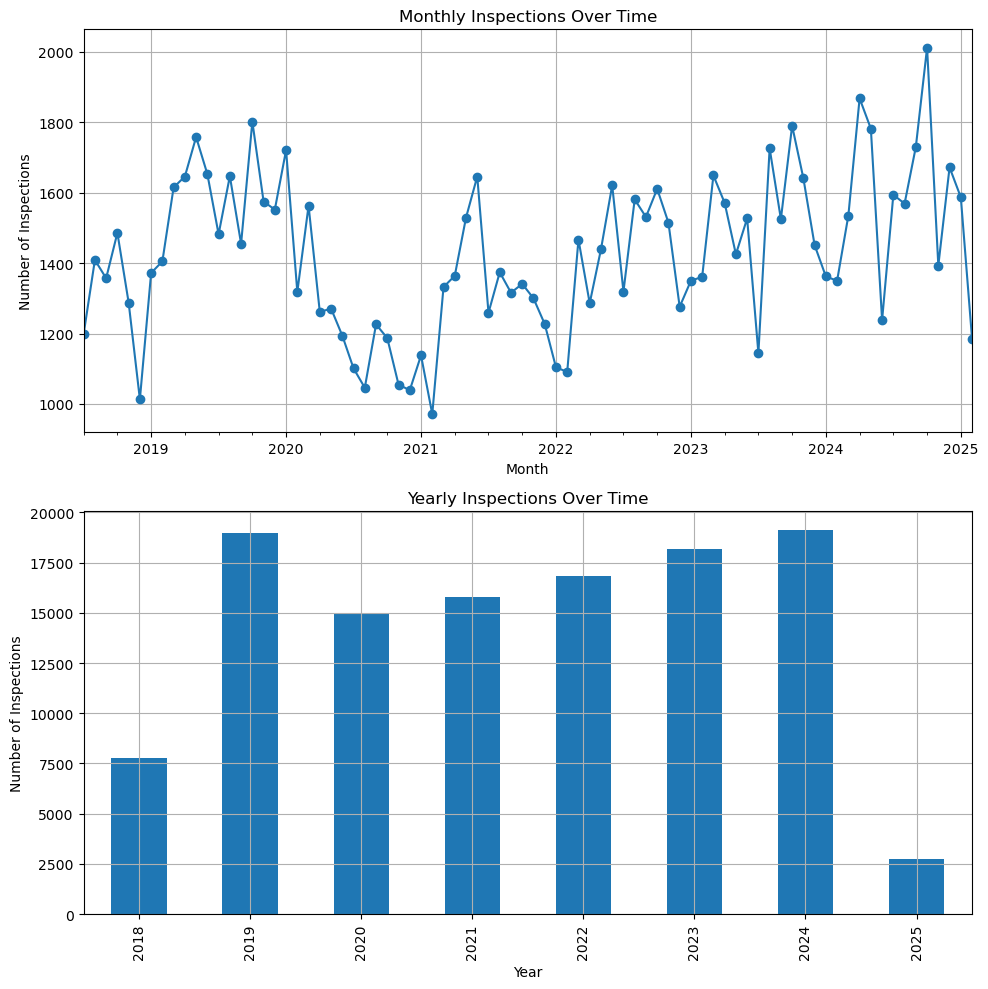

80

In [87]:
# Ensure Inspection_Date is in datetime format
dataset['Inspection_Date'] = pd.to_datetime(dataset['Inspection_Date'])
yearly_inspections = dataset.groupby(dataset['Inspection_Date'].dt.to_period('Y'))['Violations'].size()

monthly_inspections = dataset.groupby(dataset['Inspection_Date'].dt.to_period('M'))['Violations'].size()


fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot monthly inspections
monthly_inspections.plot(kind='line', marker='o', ax=axs[0])
axs[0].set_title('Monthly Inspections Over Time')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Inspections')
axs[0].grid(True)

# Plot yearly inspections
yearly_inspections.plot(kind='bar', ax=axs[1])
axs[1].set_title('Yearly Inspections Over Time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Inspections')
axs[1].grid(True)

plt.tight_layout()
plt.show()


monthly_inspections.count()

In [ ]:
results_by_state = dataset.groupby(['State', 'Results']).size().unstack(fill_value=0)
results_by_state

Results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions
State,,,,,,,
CA,0,0,0,0,0,1,1
CO,0,0,0,0,1,0,0
IL,24,22307,6957,2414,8598,47110,26852
IN,0,3,0,0,0,6,0
WI,0,0,0,0,0,0,1


In [ ]:
Result_value_counts = dataset['Results'].value_counts()
Result_value_counts.

Results
Pass                    47178
Pass w/ Conditions      26866
Fail                    22330
Out of Business          8600
No Entry                 6958
Not Ready                2415
Business Not Located       24
Name: count, dtype: int64